In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load NumPy data

Extract .npz files with array from each category:

In [ ]:
!cp -r '/content/drive/MyDrive/NN1_packet_classification' '/content' #копирование из директории 1 в директорию 2

In [ ]:
!7z x /content/NN1_packet_classification/ext.7z

In [ ]:
!rm -r /content/

### Load from `.npz` file

In [ ]:
import numpy as np
import tensorflow as tf
import os

In [ ]:
train_examples = []
train_labels = []
test_examples = []
test_labels = []
for npz_file_number in range(48):
    data = np.load('/content/short/short_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      train_examples.append(data['arr_'+str(j)])
      train_labels.append(1)
for npz_file_number in range(48,50):
    data = np.load('/content/short/short_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      test_examples.append(data['arr_'+str(j)])
      test_labels.append(1)
for npz_file_number in range(48):
    data = np.load('/content/ext/ext_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      train_examples.append(data['arr_'+str(j)])
      train_labels.append(2)
for npz_file_number in range(48,50):
    data = np.load('/content/ext/ext_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      test_examples.append(data['arr_'+str(j)])
      test_labels.append(2)
for npz_file_number in range(48):
    data = np.load('/content/noise/n_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      train_examples.append(data['arr_'+str(j)])
      train_labels.append(0)
for npz_file_number in range(48,50):
    data = np.load('/content/noise/n_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      test_examples.append(data['arr_'+str(j)])
      test_labels.append(0)
print(np.shape(train_examples),np.shape(train_labels))
print(np.shape(test_examples),test_labels)

(6048, 600) (6048,)
(252, 600) [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Load NumPy arrays with `tf.data.Dataset`

Assuming you have an array of examples and a corresponding array of labels, pass the two arrays as a tuple into `tf.data.Dataset.from_tensor_slices` to create a `tf.data.Dataset`.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

### Shuffle and batch the datasets

In [ ]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 6048

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### Build and train a model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=False),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset, epochs=20)

Epoch 1/20
95/95 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9883
Epoch 2/20
95/95 [==============================] - 0s 4ms/step - loss: 1.4980e-05 - accuracy: 1.0000
Epoch 3/20
95/95 [==============================] - 0s 4ms/step - loss: 7.2219e-08 - accuracy: 1.0000
Epoch 4/20
95/95 [==============================] - 0s 4ms/step - loss: 1.3206e-09 - accuracy: 1.0000
Epoch 5/20
95/95 [==============================] - 0s 4ms/step - loss: 2.9566e-10 - accuracy: 1.0000
Epoch 6/20
95/95 [==============================] - 0s 4ms/step - loss: 1.1826e-10 - accuracy: 1.0000
Epoch 7/20
95/95 [==============================] - 0s 4ms/step - loss: 5.9132e-11 - accuracy: 1.0000
Epoch 8/20
95/95 [==============================] - 0s 4ms/step - loss: 5.9132e-11 - accuracy: 1.0000
Epoch 9/20
95/95 [==============================] - 0s 4ms/step - loss: 1.9711e-11 - accuracy: 1.0000
Epoch 10/20
95/95 [==============================] - 0s 4ms/step - loss: 1.9711e-11 - 

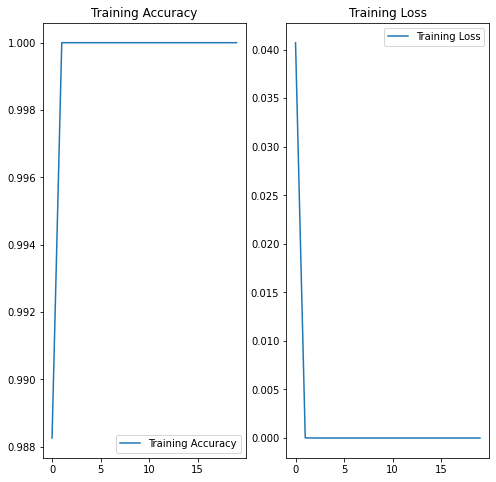

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_acc']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
!7z x /content/stream_1090_ext.7z

In [ ]:
results = model.evaluate(test_dataset)
print("test loss, test acc:", results)
#'/content/stream/stream_1090'+'.npz'

data = np.load('/content/stream_1090'+'.npz')
print(data.files)
print(len(data['arr_0']))
stream = data['arr_0']
signal_window=[]
for i in range(101): 
    signal_window.append(stream[i+0:i+600])
print(np.shape(signal_window))
sig_arr=np.array(signal_window)
classes = np.argmax(model.predict(sig_arr), axis=-1) # 1)с индекса 46710 до 46774 
flat_classes= classes.flatten('F')
print(len(flat_classes))
np.set_printoptions(threshold=np.inf)
print(flat_classes)

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
test loss, test acc: [0.0, 1.0]
['arr_0']
700
(101, 600)
101
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1]


In [ ]:
from tensorflow import keras
model.save("my_modelclassific1") # MAIN SAVING MODEL FUNCTION (USE ONLY WITH CORRECT/IMPROVED MODELS)

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_modelclassific1")

# Let's check:
np.testing.assert_allclose(
    model.predict(test_dataset), reconstructed_model.predict(test_dataset)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(test_dataset)

INFO:tensorflow:Assets written to: my_modelclassific1/assets
4/4 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
!rsync -r --progress "/content/my_modelclassific1" "/content/drive/MyDrive" 

just for check with the actual output (the less 1s - the better result of point where the signal starts)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1]
